In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random
from optbinning import BinningProcess
from scipy.stats import chi2_contingency, ks_2samp

In [23]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Doll03/4IZ480/main/Data/TimeDeposit_10K.csv', sep=";")


In [24]:
random.seed(555)

In [25]:
dataset

,Customer_ID,Gender,Birth_Date,Ref_Date,Marital_Status,Children_Num,Occupation_Category,Total_Income,Payroll_Flag,Business_Flag,...,Transfer_Trans_Amount,Credit_Cards_Installments,Credit_Cards_Payments_Num,Credit_Cards_Purchases_Num,Credit_Cards_Witrhdrawals_Num,Credit_Cards_Payments_Amount,Credit_Cards_Purchases_Amount,Credit_Cards_Witrhdrawals_Amount,Arrears_Months_Max,Time_Deposits_Flag
0,5904453.0,Male,1960-10-17,2008-12-31,Married,2.0,Rentiers,14000.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,F
1,5904524.0,Male,1972-02-22,2008-12-31,Divorced,0.0,Employees,17577.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,F
2,5904672.0,Male,1953-06-24,2008-12-31,Married,1.0,Rentiers,3000.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,F
3,125603.0,Male,1952-09-19,2008-12-31,Married,0.0,Rentiers,14735.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,F
4,1065914.0,Male,1960-08-04,2008-12-31,Single,0.0,Business-Owners,99755.0,0.0,1.0,...,0.0,8.666667,3.500000,2.000000,0.0,275.833333,78.220000,0.0,2.0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5898642.0,Male,1979-06-02,2008-12-31,Single,0.0,Unemployeed,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,F
9996,5901282.0,Female,1961-05-13,2008-12-31,Single,0.0,Employees,49784.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,F
9997,5901744.0,Female,1964-09-05,2008-12-31,Married,3.0,Employees,34771.0,0.0,0.0,...,0.0,2.000000,0.833333,0.666667,0.0,32.166666,21.346666,0.0,0.0,F
9998,5902245.0,Female,1975-05-03,2008-12-31,Married,0.0,Business-Owners,3800.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,F


In [45]:
dataset["Customer_ID"] = dataset["Customer_ID"].astype("object")
dataset["Birth_Date"] = dataset["Birth_Date"].astype("datetime64")
dataset["Ref_Date"] = dataset["Ref_Date"].astype("datetime64")
dataset["Gender"] = [True if i == "Male" else False for i in dataset['Gender']]# 1=Male 0=Female
dataset["Marital_Status"] = dataset["Marital_Status"].astype("category")
dataset["Children_Num"] = dataset["Children_Num"].astype("int64")
dataset["Occupation_Category"] = dataset["Occupation_Category"].astype("category")
dataset["Payroll_Flag"] = dataset["Payroll_Flag"].astype("bool")
dataset["Business_Flag"] = dataset["Business_Flag"].astype("bool")
dataset["Saving_Current_Accounts_Flag"] = dataset["Saving_Current_Accounts_Flag"].astype("bool")
dataset["Investment_Products_Flag"] = dataset["Investment_Products_Flag"].astype("bool")
dataset["Insurance_Products_Flag"] = dataset["Insurance_Products_Flag"].astype("bool")
dataset["Business_Loans_Flag"] = dataset["Business_Loans_Flag"].astype("bool")
dataset["Housing_Loans_Flag"] = dataset["Housing_Loans_Flag"].astype("bool")
dataset["Consumer_Loans_Flag"] = dataset["Consumer_Loans_Flag"].astype("bool")
dataset["Credit_Cards_Flag"] = dataset["Credit_Cards_Flag"].astype("bool")
dataset["Time_Deposits_Flag2"] = [True if i == "T" else False for i in dataset['Time_Deposits_Flag']]
dataset["Time_Deposits_Flag"] = dataset["Time_Deposits_Flag2"]


In [27]:
#Creating Age variable based on birth year and reference year.
dataset['Age'] = dataset['Ref_Date'].dt.year - dataset['Birth_Date'].dt.year

In [28]:
#Creating boolean variables 
dataset["Credit_Cards_Installments_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Installments']]
dataset["Credit_Cards_Payments_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Payments_Num']]
dataset["Credit_Cards_Purchases_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Purchases_Num']]
dataset["Credit_Cards_Witrhdrawals_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Witrhdrawals_Num']]
dataset["Internet_Trans_Flag"] = [True if i > 0 else False for i in dataset['Internet_Trans_Num']]
dataset["Deposit_Trans_Flag"] = [True if i > 0 else False for i in dataset['Deposit_Trans_Num']]
dataset["Payment_Trans_Flag"] = [True if i > 0 else False for i in dataset['Payment_Trans_Num']]
dataset["Transfer_Trans_Flag"] = [True if i > 0 else False for i in dataset['Transfer_Trans_Num']]
dataset["Withdrawl_Trans_Flag"] = [True if i > 0 else False for i in dataset['Withdrawl_Trans_Num']]

In [29]:
cat_v_list = [i for i in list (dataset.columns) if (dataset[i].dtypes in ["o", "bool"])]
cat_v_list.remove("Time_Deposits_Flag")

False    0.9897
True     0.0103
Name: Time_Deposits_Flag, dtype: float64


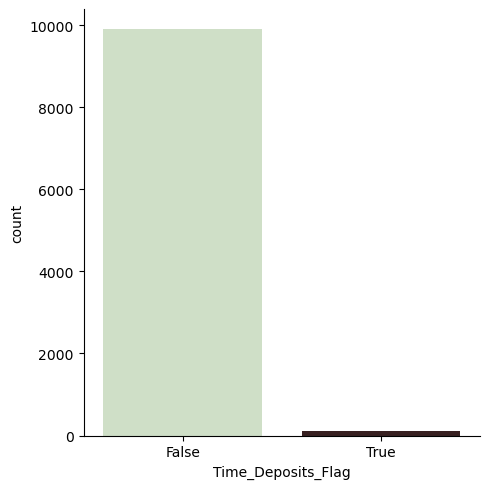

In [30]:
print(dataset['Time_Deposits_Flag'].value_counts(normalize = True))

sns.catplot(data = dataset, x = "Time_Deposits_Flag", kind = "count", palette = "ch:.75")


Binning

In [31]:
dataset2 = dataset.copy()

In [32]:
dataset2.drop(['Customer_ID','Ref_Date','Birth_Date'],axis=1,inplace=True)

In [58]:
print(dataset2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            10000 non-null  bool   
 1   Marital_Status                    10000 non-null  bool   
 2   Children_Num                      10000 non-null  int64  
 3   Occupation_Category               10000 non-null  bool   
 4   Total_Income                      10000 non-null  float64
 5   Payroll_Flag                      10000 non-null  bool   
 6   Business_Flag                     10000 non-null  bool   
 7   Saving_Current_Accounts_Flag      10000 non-null  bool   
 8   Investment_Products_Flag          10000 non-null  bool   
 9   Insurance_Products_Flag           10000 non-null  bool   
 10  Business_Loans_Flag               10000 non-null  bool   
 11  Housing_Loans_Flag                10000 non-null  bool   
 12  Consu

0     5909
2     1875
1     1699
3      415
4       81
5       14
6        4
8        2
10       1
Name: Children_Num, dtype: int64


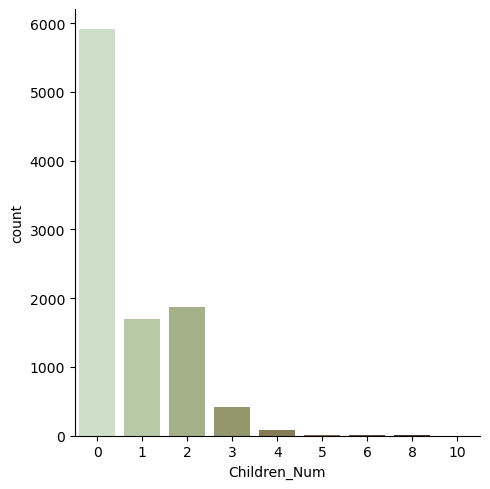

In [43]:
print(dataset['Children_Num'].value_counts(normalize = False))
sns.catplot(data = dataset2, x = "Children_Num", kind = "count", palette = "ch:.79")

In [35]:
dataset2["Marital_Status"] = [True if i == "Married" else False for i in dataset['Marital_Status']]
dataset2["Occupation_Category"] = [True if i == "Employees" else False for i in dataset['Occupation_Category']]

In [36]:

target = dataset2["Time_Deposits_Flag"]
feature = dataset2.drop("Time_Deposits_Flag", axis= 1)

In [37]:
feature.head()

,Gender,Marital_Status,Children_Num,Occupation_Category,Total_Income,Payroll_Flag,Business_Flag,Saving_Current_Accounts_Flag,Investment_Products_Flag,Insurance_Products_Flag,...,Age,Credit_Cards_Installments_Flag,Credit_Cards_Payments_Flag,Credit_Cards_Purchases_Flag,Credit_Cards_Witrhdrawals_Flag,Internet_Trans_Flag,Deposit_Trans_Flag,Payment_Trans_Flag,Transfer_Trans_Flag,Withdrawl_Trans_Flag
0,True,True,2,False,14000.0,False,False,True,False,False,...,48,False,False,False,False,False,True,True,False,False
1,True,False,0,True,17577.0,False,False,True,False,False,...,36,False,False,False,False,False,True,True,False,True
2,True,True,1,False,3000.0,False,False,True,False,False,...,55,False,False,False,False,False,False,False,False,True
3,True,True,0,False,14735.0,False,False,True,False,False,...,56,False,False,False,False,False,False,False,False,False
4,True,False,0,False,99755.0,False,True,True,False,True,...,48,True,True,True,False,False,True,True,False,True


In [38]:
variable_names = list(feature.columns[:])

X = dataset2[variable_names]
y = dataset2["Time_Deposits_Flag"].values

In [56]:
num_v_list = list(dataset2[["Total_Income"]].columns)
cat_v_list = [i for i in list(dataset2.columns) if i not in num_v_list]

In [55]:
binning_process = BinningProcess(variable_names, max_n_bins = 4)
                                 
binning_process.fit(X, y,)

optb_age = binning_process.get_binned_variable("Age")

optb_age.binning_table.build()


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 32.50)",2394,0.2394,2386,8,0.003342,1.132674,0.185094,0.021974
1,"[32.50, 51.50)",5261,0.5261,5210,51,0.009694,0.061252,0.001916,0.000239
2,"[51.50, 60.50)",1473,0.1473,1454,19,0.012899,-0.227623,0.008548,0.001066
3,"[60.50, inf)",872,0.0872,847,25,0.028670,-1.042433,0.163805,0.019596
4,Special,0,0.0000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.0000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,10000,1.0000,9897,103,0.010300,,0.359362,0.042876


In [40]:
def binning (dataset2):
    bn = BinningProcess(list(feature.columns), categorical_variables = list(cat_v_list.values()))
    bn.fit(feature, target)
    
    
    feature_fitted = bn.transform(feature, metric = "woe")
    bins_woe = pd.DataFrame()
    for i in feature_fitted.columns:
        
        var = bn.get_binned_variable(i).binning_table.build()
        var = var[(~var['Bin'].isin(['Special', 'Missing'])) & (~var.index.isin(['Totals']))]
        var['Variable'] = i

        bins_woe = pd.concat((bins_woe, var))

    return feature_fitted, bins_woe.loc[:,~bins_woe.columns.isin(['IV','JS'])]